<a href="https://colab.research.google.com/github/wojr21/courses/blob/main/data_science_bootcamp/05_regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn

### Wygenerowanie danych

In [4]:
import numpy as np

X = np.arange(0, 50, 0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1, 1)

print('Rozmiar X: ',X.shape)
print('Rozmiar Y: ',y.shape)

Rozmiar X:  (100, 1)
Rozmiar Y:  (100,)


### Zbiór treningowy i testowy

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (75, 1)
X_test shape:  (25, 1)
y_train shape:  (75,)
y_test shape:  (25,)


### Wizualizacja

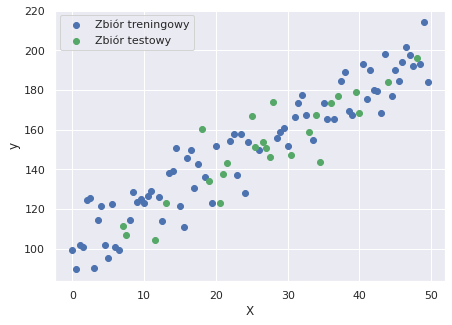

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize = (7, 5))
plt.scatter(X_train, y_train, c = 'b', label = 'Zbiór treningowy')
plt.scatter(X_test, y_test, c = 'g', label = 'Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Regresja liniowa

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[1.93697048]
102.46795421372516


In [36]:
import pandas as pd

results = pd.DataFrame([lin_reg.intercept_])
results = results.append(pd.DataFrame(lin_reg.coef_), ignore_index = True)
results.columns = ['Weights']
results

,Weights
0,102.467954
1,1.936970


Y = 102.468 + 1.937 * x1

### Wizualizacja zbioru treningowego i dopasowanego modelu